In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[(df.innings == 1) | (df.innings == 2)]
df.innings.unique()

array([1, 2], dtype=int64)

In [5]:
del_df = pd.read_csv('deliveries.csv')
del_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


### Filtering the data from 2017 to 2021

In [6]:
req_df = df[(df.season >= 2017) & (df.season <= 2021)]
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136598,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.3,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136599,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.4,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,Mandeep Singh,NaN,NaN
136600,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.5,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136601,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.6,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
req_df['wicket_type'].unique()

array([nan, 'bowled', 'caught', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [7]:
def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [8]:
req_df['isBowlerWk'] = req_df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['wicket_type']), axis = 1)

In [9]:
import math
def total_overs(balls):
	if balls%6 == 0: 
		return balls/6
	return balls%6/10 + balls//6

### Finding Bowler statistics

In [10]:
def bowlerStats(req_df,current_innings):
    
    req_df = req_df[req_df.innings == current_innings]
    req_df.reset_index(inplace = True, drop = True)
    req_df['total_runs'] = req_df['runs_off_bat']+req_df['extras']

    req_df['isDot'] = req_df['total_runs'].apply(lambda x : 1 if x == 0 else 0)

    req_df['isOne'] = req_df['total_runs'].apply(lambda x : 1 if x == 1 else 0)

    req_df['isTwo'] = req_df['total_runs'].apply(lambda x : 1 if x == 2 else 0)

    req_df['isThree'] = req_df['total_runs'].apply(lambda x : 1 if x == 3 else 0)

    req_df['isFour'] = req_df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)

    req_df['isFive'] = req_df['total_runs'].apply(lambda x : 1 if x == 5 else 0)

    req_df['isSix'] = req_df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)

    req_df['isSeven'] = req_df['total_runs'].apply(lambda x : 1 if x == 7 else 0)

    runs = pd.DataFrame(req_df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns = {'total_runs':'runs'})

    innings = pd.DataFrame(req_df.groupby(['bowler'])['match_id'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'match_id':'innings'})

    balls = pd.DataFrame(req_df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})

    dismissals = pd.DataFrame(req_df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns = {'isBowlerWk':'Dismissals'})

    dots = pd.DataFrame(req_df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'Dots'})

    ones = pd.DataFrame(req_df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})

    twos = pd.DataFrame(req_df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})

    threes = pd.DataFrame(req_df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})

    fours = pd.DataFrame(req_df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})

    fives = pd.DataFrame(req_df.groupby(['bowler'])['isFive'].sum()).reset_index().rename(columns = {'isFive':'Fives'})

    sixes = pd.DataFrame(req_df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    Sevens = pd.DataFrame(req_df.groupby(['bowler'])['isSeven'].sum()).reset_index().rename(columns = {'isSeven':'Sevens'})

    req_df = pd.merge(innings, balls, on = 'bowler').merge(runs, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(ones, on = 'bowler').merge(twos, on = 'bowler').merge(threes, on = 'bowler').merge(fours, on = 'bowler').merge(fives, on = 'bowler').merge(sixes, on = 'bowler').merge(Sevens, on = 'bowler')

    req_df['dot%'] = req_df.apply(lambda x: 100*(x['Dots']/x['balls']), axis = 1)
#     if req_df['Dismissals'] != 0:
#         Dismissals = 9
#         req_df['Bowling_SR'] = req_df.apply(lambda x: 100*(x['balls']/x['Dismissals']), axis = 1)
    req_df['Bowling_avg'] = req_df.apply(lambda x: (x['runs']/x['Dismissals']) if x['Dismissals'] != 0 else 0, axis = 1)
    req_df['Bowling_SR'] = req_df.apply(lambda x: (x['balls']/x['Dismissals']) if x['Dismissals'] != 0 else 0, axis = 1)
    
    req_df['Overs'] = req_df.apply(lambda x: total_overs(x['balls']), axis = 1)
    req_df['Economy_Rate'] = req_df.apply(lambda x: (x['runs']/x['Overs']) if x['Overs'] != 0 else 0, axis = 1)
    #req_df['3_Wickets'] = req_df.apply(lambda x : (x['Dismissals'].) if (x['Dismissals'] >= 3 and x['Dismissals'] < 5) else 0, axis =1)

    return req_df

In [11]:
req_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
sub_df = df[(df.season >= 2017) & (df.season <= 2021)]

In [13]:
sub_df['wicket_type'].unique()

array([nan, 'bowled', 'caught', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [14]:
sub_df['isBowlerWk'] = sub_df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['wicket_type']), axis = 1)

In [15]:
sub_df.to_excel("overall.xlsx")

In [ ]:
# dot% vs no_of_dismissals in ing 1/2

In [18]:
df1['Overs'] = df1['Overs'].astype(float)

In [17]:
df1 = bowlerStats(req_df, 1)

In [19]:
df1.dtypes

bowler          object 
innings         int64  
balls           int64  
runs            int64  
Dismissals      int64  
Dots            int64  
Ones            int64  
Twos            int64  
Threes          int64  
Fours           int64  
Fives           int64  
Sixes           int64  
Sevens          int64  
dot%            float64
Bowling_avg     float64
Bowling_SR      float64
Overs           float64
Economy_Rate    float64
dtype: object

In [20]:
df1.to_excel("Innings1_data.xlsx")

In [21]:
df2 = bowlerStats(req_df, 2)

In [22]:
df2.to_excel("Innings2_data.xlsx")

In [23]:
df2.bowler.unique()

array(['A Choudhary', 'A Dananjaya', 'A Mishra', 'A Nehra', 'A Nortje',
       'A Zampa', 'AB Dinda', 'AD Mathews', 'AD Russell', 'AF Milne',
       'AJ Tye', 'AR Patel', 'AS Joseph', 'AS Rajpoot', 'AS Roy',
       'Abdul Samad', 'Abhishek Sharma', 'Ankit Sharma', 'Ankit Soni',
       'Anureet Singh', 'Arshdeep Singh', 'Avesh Khan', 'B Kumar',
       'B Laughlin', 'B Stanlake', 'BA Stokes', 'BB Sran', 'BCJ Cutting',
       'Basil Thampi', 'Bipul Sharma', 'C Sakariya', 'C de Grandhomme',
       'CH Gayle', 'CH Morris', 'CJ Anderson', 'CJ Dala', 'CJ Green',
       'CJ Jordan', 'CR Brathwaite', 'CR Woakes', 'CV Varun', 'DA Warner',
       'DJ Bravo', 'DJ Hooda', 'DJ Willey', 'DJM Short', 'DL Chahar',
       'DR Sams', 'DR Smith', 'DS Kulkarni', 'DT Christian', 'DW Steyn',
       'FA Allen', 'GC Viljoen', 'GJ Maxwell', 'HF Gurney', 'HH Pandya',
       'HV Patel', 'Harbhajan Singh', 'Harpreet Brar', 'I Sharma',
       'I Udana', 'IK Pathan', 'IS Sodhi', 'Imran Tahir', 'Iqbal Abdulla',
     

### Visualization of each KPI with respect to Number of Dismissals

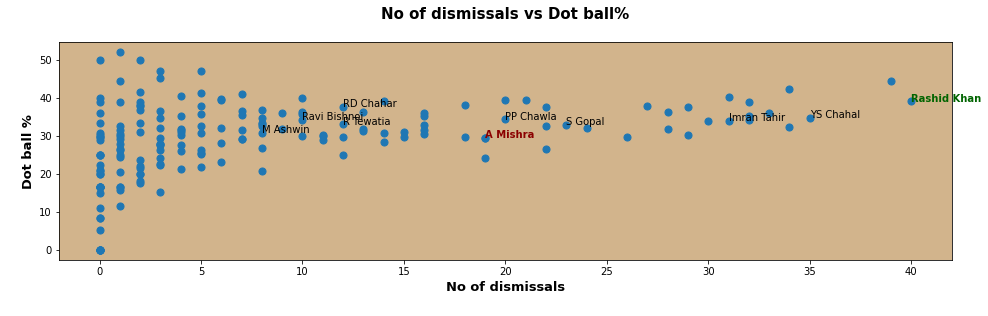

In [24]:
#No of dismissals vs Dot ball in 1st Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df1['Dismissals'], df1['dot%'],s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nDot ball %',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Dot ball%\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df1['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Rashid Khan'):
            plt.annotate(j, (df1['Dismissals'][i], df1['dot%'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'A Mishra'):
            plt.annotate(j, (df1['Dismissals'][i], df1['dot%'][i]),color = 'darkRed', fontweight ='bold')
        else:   
            plt.annotate(j, (df1['Dismissals'][i], df1['dot%'][i]))
plt.savefig("dismissals_vs_dotball_1st_inn")

plt.show()

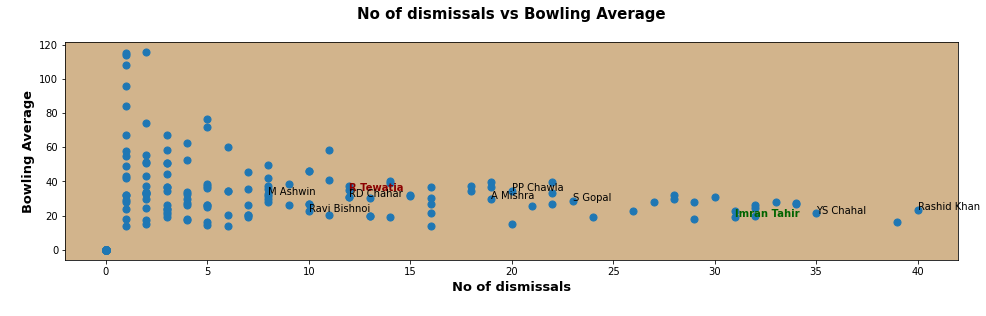

In [25]:
#No of dismissals vs Average in 1st Innings of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df1['Dismissals'], df1['Bowling_avg'],s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nBowling Average',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Bowling Average\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df1['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Imran Tahir'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_avg'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'R Tewatia'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_avg'][i]),color = 'darkRed', fontweight ='bold')
        else:   
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_avg'][i]))
plt.savefig("dismissals_vs_average_1st_inn")
plt.show()

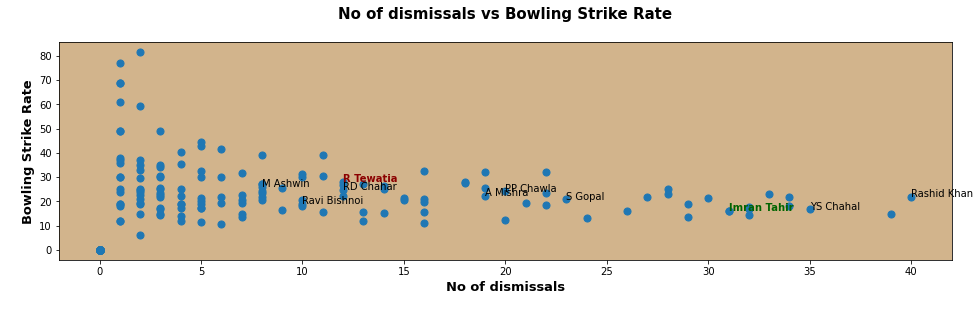

In [26]:
#No of dismissals vs SR in 1st Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df1['Dismissals'], df1['Bowling_SR'],s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nBowling Strike Rate',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Bowling Strike Rate\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df1['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Imran Tahir'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_SR'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'R Tewatia'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_SR'][i]),color = 'darkRed', fontweight ='bold')
        else:   
            plt.annotate(j, (df1['Dismissals'][i], df1['Bowling_SR'][i]))
plt.savefig("dismissals_vs_sr_1st_inn")
plt.show()

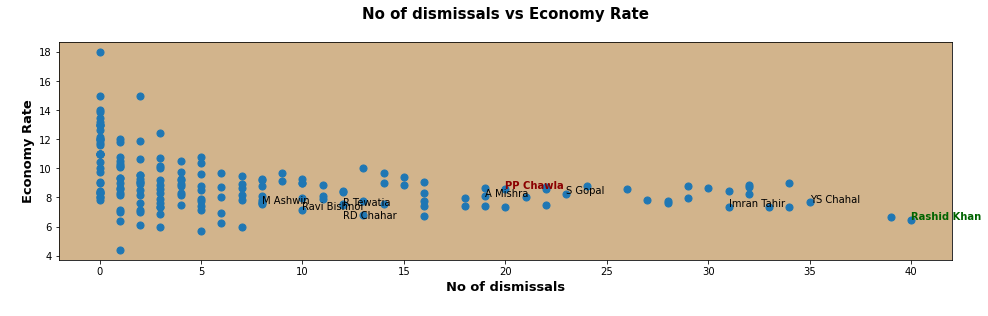

In [27]:
#No of dismissals vs Economy Rate in 1st Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df1['Dismissals'], df1['Economy_Rate'],s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nEconomy Rate',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Economy Rate\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df1['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Rashid Khan'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Economy_Rate'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'RD Chahar'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Economy_Rate'][i]-1))
        elif(j == 'PP Chawla'):
            plt.annotate(j, (df1['Dismissals'][i], df1['Economy_Rate'][i]),color = 'darkRed', fontweight ='bold')
        else:   
            plt.annotate(j, (df1['Dismissals'][i], df1['Economy_Rate'][i]))
plt.savefig("dismissals_vs_ER_1st_inn")
plt.show()

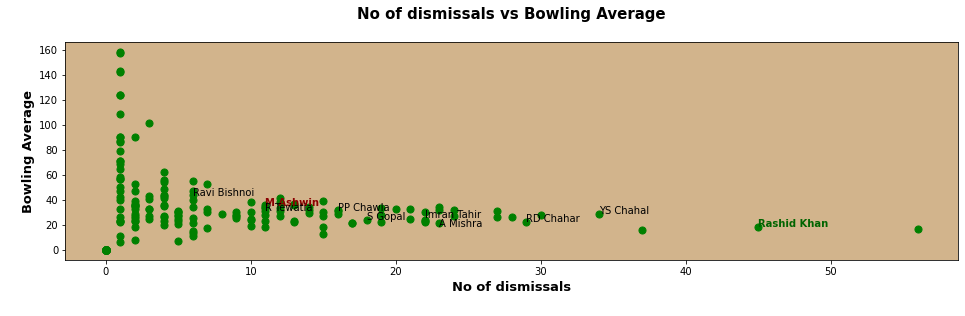

In [28]:
#No of dismissals vs Average in 2nd Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df2['Dismissals'], df2['Bowling_avg'], color ='g',s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nBowling Average',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Bowling Average\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df2['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Rashid Khan'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_avg'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'M Ashwin'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_avg'][i]),color = 'darkRed', fontweight ='bold')
        elif(j == 'A Mishra' or j == 'R Tewatia'):   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_avg'][i]-3)) 
        elif(j == 'Imran Tahir'):   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_avg'][i]+3)) 
        else:   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_avg'][i]))
plt.savefig("dismissals_vs_average_2nd_inn")
plt.show()

In [30]:
df1['Bowling_avg'].mean(), df2['Bowling_avg'].mean()

(29.267031055612946, 32.37760519125936)

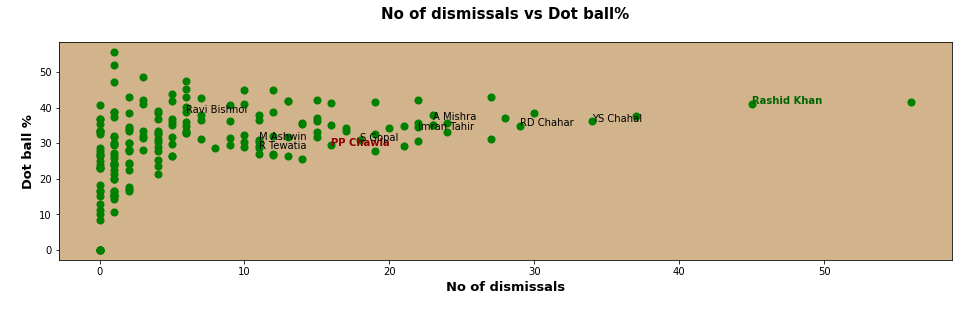

In [31]:
#No of dismissals vs Dot ball in 2nd Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df2['Dismissals'], df2['dot%'], color = 'g',s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nDot ball %',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Dot ball%\n',fontweight ='bold', fontsize = 15)
selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df2['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'A Mishra'):
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]+1.5))
        elif(j == 'PP Chawla'):
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]),color = 'darkRed', fontweight ='bold')
        elif(j == 'Imran Tahir'):
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]-2))
        elif(j == 'Rashid Khan'):
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'R Tewatia'):
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]-2))
        else:
            plt.annotate(j, (df2['Dismissals'][i], df2['dot%'][i]))
plt.savefig("dismissals_vs_dotball_2nd_inn")
plt.show()

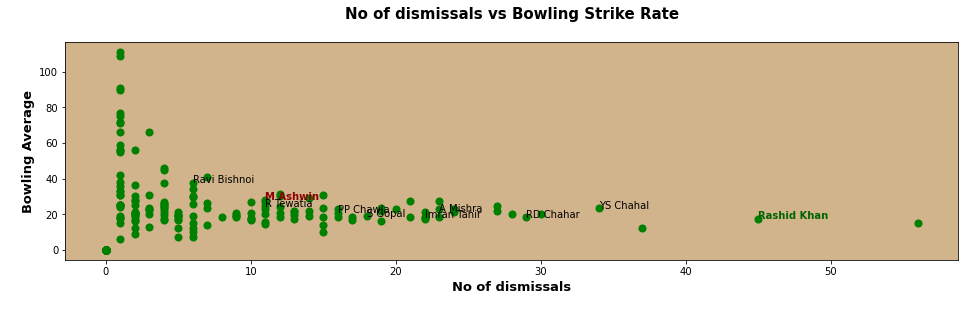

In [32]:
#No of dismissals vs SR in wnd Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df2['Dismissals'], df2['Bowling_SR'],color='g',s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nBowling Average',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Bowling Strike Rate\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df2['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Rashid Khan'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_SR'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'M Ashwin'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_SR'][i]),color = 'darkRed', fontweight ='bold')
        elif(j == 'A Mishra'):   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_SR'][i]+3))
        elif(j == 'R Tewatia'):   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_SR'][i]-3))
        else:   
            plt.annotate(j, (df2['Dismissals'][i], df2['Bowling_SR'][i]))
plt.savefig("dismissals_vs_sr_2nd_inn")
plt.show()

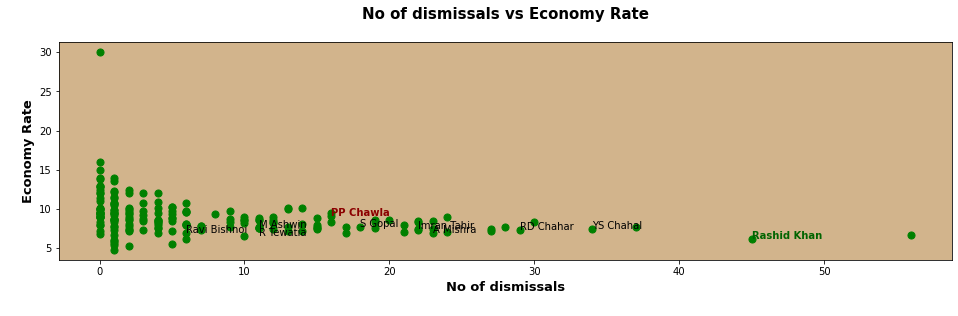

In [33]:
#No of dismissals vs Economy Rate in 2nd Innings % of leg spinners from ipl 2017 to ipl 2021
plt.figure(figsize = (16, 4))
plt.rcParams['axes.facecolor'] = 'tan'
plt.scatter(df2['Dismissals'], df2['Economy_Rate'],color = 'g',s=50)
plt.xlabel('No of dismissals\n',fontweight ='bold', fontsize = 13)
plt.ylabel('\nEconomy Rate',fontweight ='bold', fontsize = 13)
plt.title('No of dismissals vs Economy Rate\n',fontweight ='bold', fontsize = 15)

selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
annotations = list(df2['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        if(j == 'Rashid Khan'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Economy_Rate'][i]),color = 'darkGreen', fontweight ='bold')
        elif(j == 'PP Chawla'):
            plt.annotate(j, (df2['Dismissals'][i], df2['Economy_Rate'][i]),color = 'darkRed', fontweight ='bold')
        elif(j == 'R Tewatia'):
             plt.annotate(j, (df2['Dismissals'][i], df2['Economy_Rate'][i]-1))
        else:   
            plt.annotate(j, (df2['Dismissals'][i], df2['Economy_Rate'][i]))
plt.savefig("dismissals_vs_dotball_1st_inn")
plt.show()

In [34]:
#df2.head(160)

In [35]:
df1['Bowling_SR'].mean(), df2['Bowling_SR'].mean()

(20.73960467389687, 22.562907527831364)

In [36]:
req_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Visualization of each bowler performance against every opposition

In [37]:
#num of wickets against all opposition 

def show_player_team_wise(selected_player):
    
    total_wickets = req_df[req_df.bowler == selected_player].groupby(['bowler'])['isBowlerWk'].sum().item()

    plt.figure(figsize = (12, 4))
    plt.rcParams['axes.facecolor'] = 'tan'
    req_df[req_df.bowler == selected_player].groupby(['batting_team'])['isBowlerWk'].sum().sort_values(ascending = False).plot(kind = 'barh', color = ['navy','mediumblue','darkslateblue','dodgerblue','darkturquoise','deepskyblue','steelblue','royalblue','cornflowerblue','lightskyblue','lightsteelblue'])
    plt.title(selected_player +  " (Wickets: " + str(total_wickets) + ")\n",fontweight ='bold', fontsize = 15)
    plt.xlabel('No of Wickets\n',fontweight ='bold', fontsize = 13)
    plt.ylabel('\nOpposition Teams',fontweight ='bold', fontsize = 13)
    plt.show()

In [38]:
#[ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']

In [39]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
136598,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.3,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
136599,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.4,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,Mandeep Singh,NaN,NaN,1
136600,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.5,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
136601,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.6,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


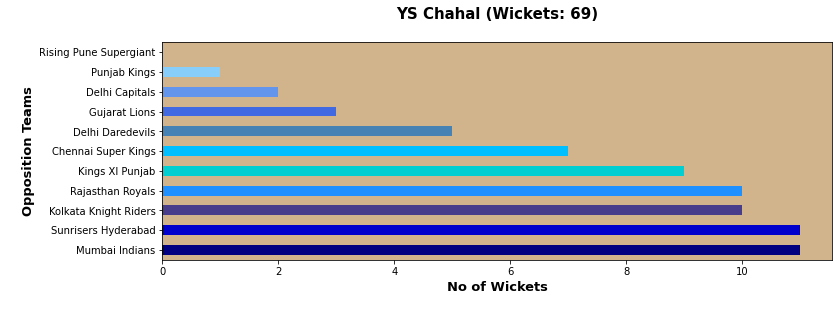

In [40]:
show_player_team_wise('YS Chahal')

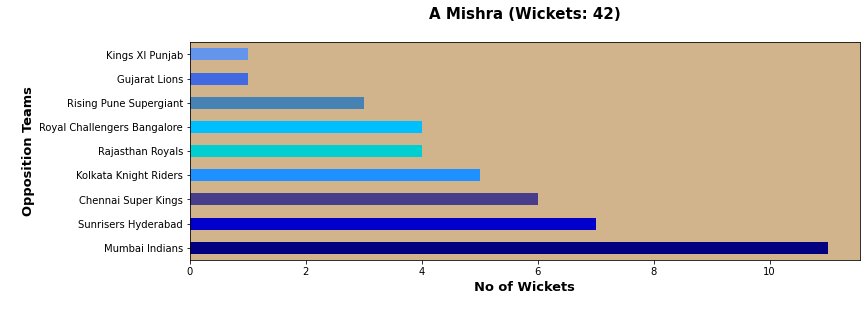

In [41]:
show_player_team_wise('A Mishra')

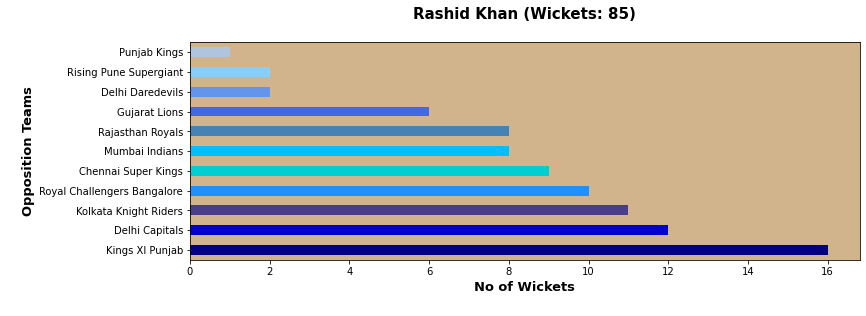

In [42]:
show_player_team_wise('Rashid Khan')

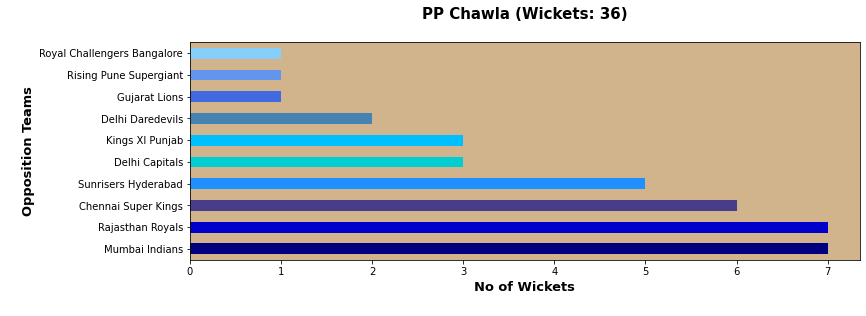

In [43]:
show_player_team_wise('PP Chawla')

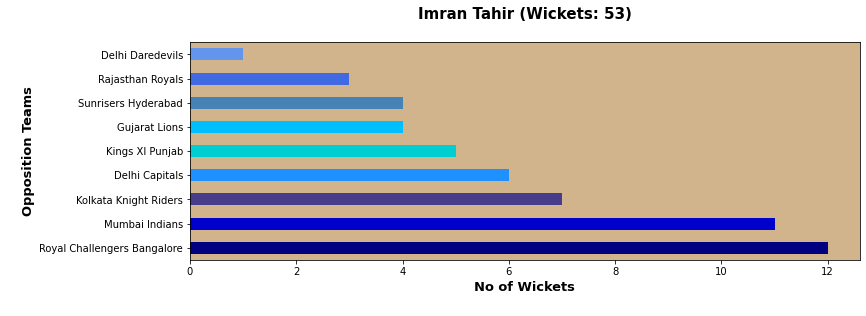

In [44]:
show_player_team_wise('Imran Tahir')

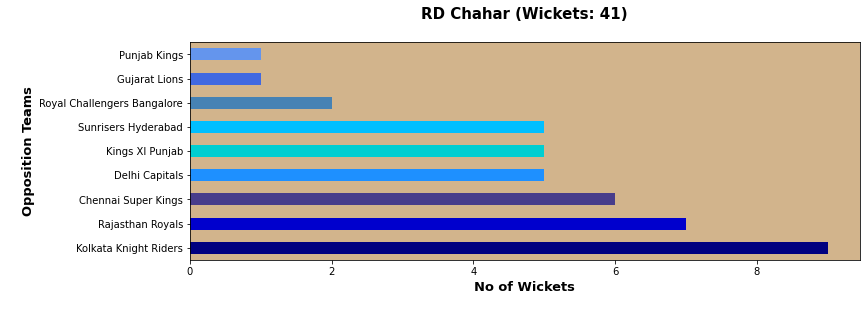

In [45]:
show_player_team_wise('RD Chahar')

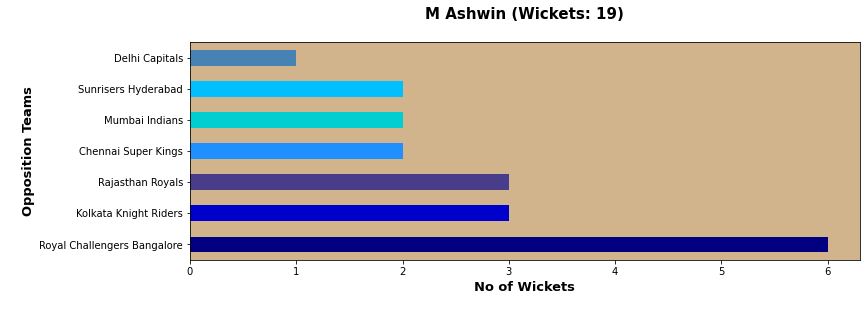

In [47]:
show_player_team_wise('M Ashwin')

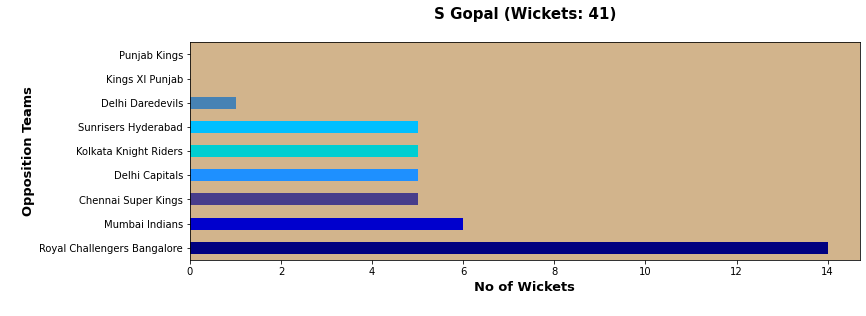

In [48]:
show_player_team_wise('S Gopal')


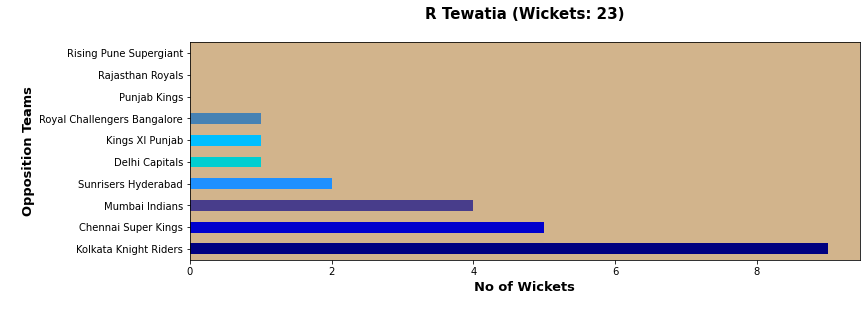

In [49]:
show_player_team_wise('R Tewatia')

In [51]:
req_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Visualization of leggies in each season in picking wickets

In [52]:
#Rashid Khan num of wickets in all Season 

def show_player_season_wise(selected_player):
    
    total_wickets = req_df[req_df.bowler == selected_player].groupby(['bowler'])['isBowlerWk'].sum().item()

    plt.figure(figsize = (12, 4))
    plt.rcParams['axes.facecolor'] = 'tan'
    if (selected_player == 'Rashid Khan'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'orange')
    elif (selected_player == 'YS Chahal'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'red')
    elif (selected_player == 'PP Chawla'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'purple')
    elif (selected_player == 'RD Chahar'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'royalblue')
    elif (selected_player == 'M Ashwin'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = '#DCDDDF')
    elif (selected_player == 'Imran Tahir'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'yellow')
    elif (selected_player == 'S Gopal'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'deeppink')
    elif (selected_player == 'R Tewatia'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'deeppink')
    elif (selected_player == 'A Mishra'):
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'cornflowerblue')
    else:
        req_df[req_df.bowler == selected_player].groupby(['season'])['isBowlerWk'].sum().plot(kind = 'bar', color = 'g')
    
    plt.title(selected_player +" (Wickets: " + str(total_wickets) + ")\n",fontweight ='bold', fontsize = 15)
    plt.xlabel('\n Year',fontweight ='bold', fontsize = 13)
    plt.ylabel('Wickets\n',fontweight ='bold', fontsize = 13)
#     plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22])
    plt.grid(False)
#     selected_bowlers = [ 'YS Chahal', 'A Mishra', 'Rashid Khan', 'PP Chawla','Imran Tahir','RD Chahar','Ravi Bishnoi','M Ashwin','S Gopal','R Tewatia']
#     annotations = list(req_df['bowler'])
#     for i in range(req_df['isBowlerWk'].sum()):
#         plt.annotate(str(req_df['isBowlerWk'].sum()[i]), xy=(req_df.season,req_df['isBowlerWk'].sum()[i]), ha='center', va='bottom')
    plt.show()

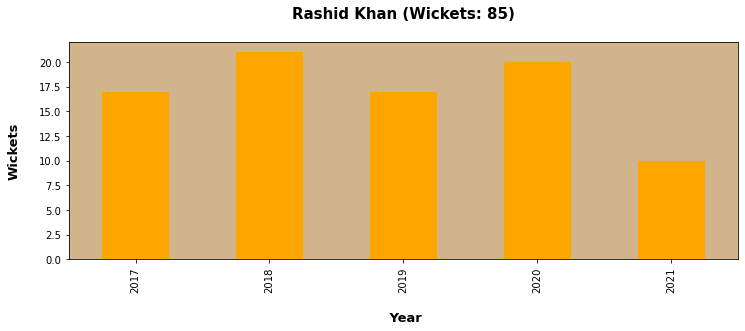

In [53]:
show_player_season_wise('Rashid Khan')

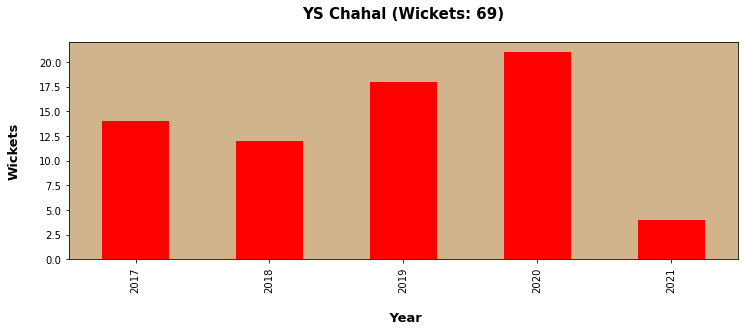

In [57]:
show_player_season_wise('YS Chahal')

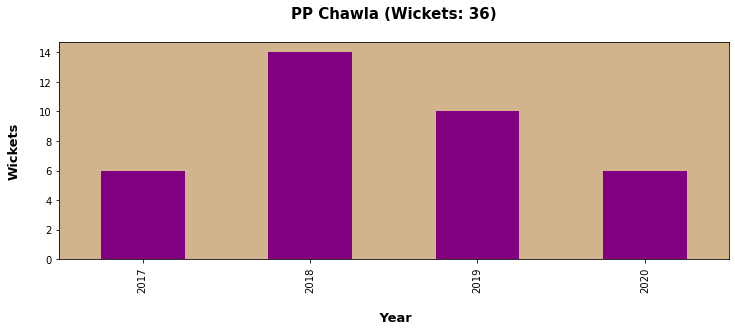

In [58]:
show_player_season_wise('PP Chawla')

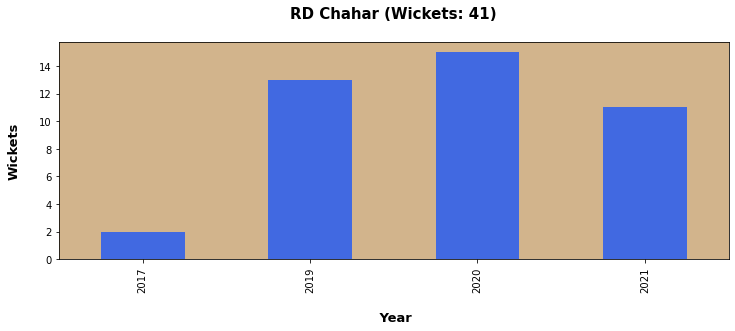

In [59]:
show_player_season_wise('RD Chahar')

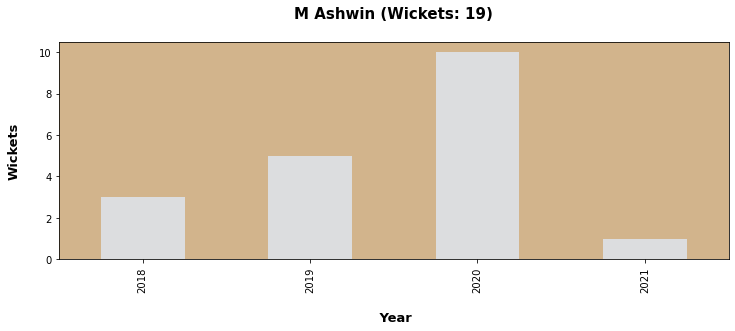

In [60]:
show_player_season_wise('M Ashwin')

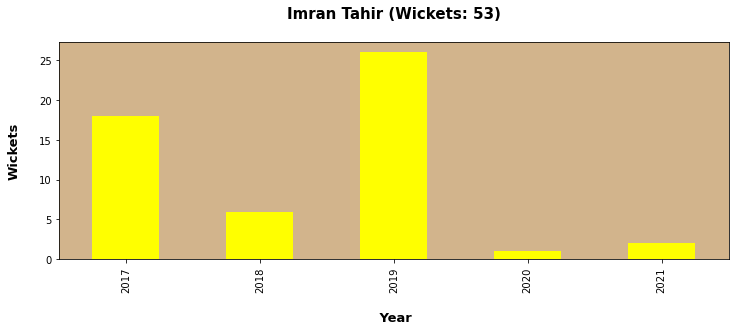

In [61]:
show_player_season_wise('Imran Tahir')

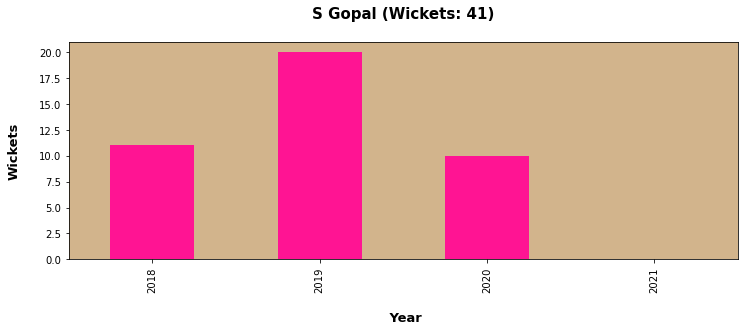

In [62]:
show_player_season_wise('S Gopal')

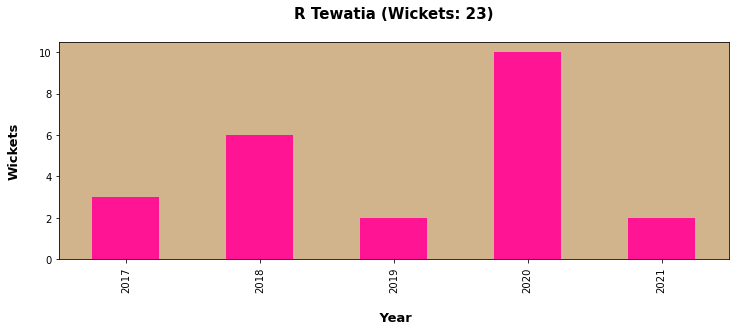

In [63]:
show_player_season_wise('R Tewatia')

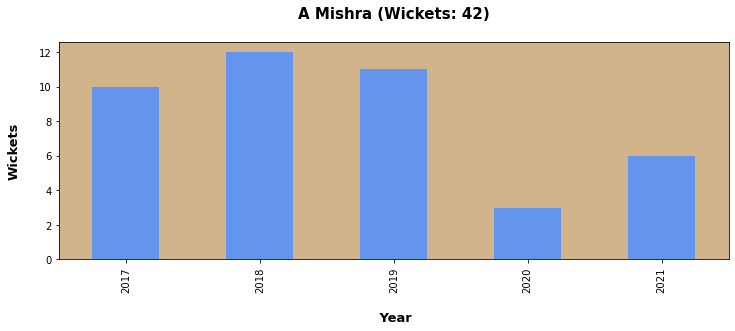

In [64]:
show_player_season_wise('A Mishra')

### Finding our leggies Best and Nightmare batsmen

In [65]:
# Find Rahid khan favourite and nightmare batsmen
rashid_df = df[(df.bowler == 'Rashid Khan')]
rashid_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
136597,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.2,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136598,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.3,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136599,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.4,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,Mandeep Singh,NaN,NaN
136600,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.5,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136601,1082591,2017,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",2,5.6,Royal Challengers Bangalore,Sunrisers Hyderabad,TM Head,CH Gayle,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:

wik_df = req_df[(req_df.bowler == 'A Mishra')]
wik_df.groupby(['striker'])['isBowlerWk'].sum().sort_values(ascending = False)

striker
SR Watson          4
Ishan Kishan       3
RG Sharma          3
HH Pandya          2
GJ Maxwell         2
S Dhawan           2
KD Karthik         2
JC Buttler         1
H Klaasen          1
MS Dhoni           1
K Gowtham          1
S Gopal            1
KA Pollard         1
KH Pandya          1
KM Jadhav          1
R Bhatia           1
MJ Guptill         1
MK Pandey          1
PA Patel           1
S Dube             1
A Zampa            1
Shivam Mavi        1
V Kohli            1
Shubman Gill       1
E Lewis            1
SW Billings        1
STR Binny          1
CR Woakes          1
AD Hales           1
DA Warner          1
SK Raina           1
Virat Singh        0
PP Chawla          0
YK Pathan          0
Q de Kock          0
R Ashwin           0
N Rana             0
V Shankar          0
R Parag            0
SA Yadav           0
RA Jadeja          0
RD Chahar          0
SV Samson          0
RD Gaikwad         0
SPD Smith          0
RK Bhui            0
RM Patidar         0
RV Ut

In [67]:
rashid_df.dtypes


match_id                  int64  
season                    int64  
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [68]:
# runs scored by this batsman
rdf1 = pd.DataFrame(rashid_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
rdf1.head()

,striker,runs_off_bat
0,AB de Villiers,38
1,AD Mathews,2
2,AD Russell,10
3,AJ Finch,37
4,AM Rahane,41


In [69]:
rdf2 = pd.DataFrame(rashid_df.groupby('striker')['ball'].count()).reset_index()
rdf2.head()

,striker,ball
0,AB de Villiers,39
1,AD Mathews,2
2,AD Russell,14
3,AJ Finch,25
4,AM Rahane,34


In [70]:
rdf3 = rdf1.merge(rdf2, on = 'striker', how = 'left')
rdf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,38,39
1,AD Mathews,2,2
2,AD Russell,10,14
3,AJ Finch,37,25
4,AM Rahane,41,34


In [71]:
rdf3['strike_rate'] = 100*rdf3['runs_off_bat']/rdf3['ball']
rdf3.tail(30)

,striker,runs_off_bat,ball,strike_rate
82,RD Gaikwad,21,11,190.909091
83,RG Sharma,18,14,128.571429
84,RK Singh,4,7,57.142857
85,RR Pant,76,65,116.923077
86,RV Uthappa,64,41,156.097561
87,S Dhawan,24,26,92.307692
88,S Dube,2,6,33.333333
89,S Gopal,8,8,100.000000
90,SA Yadav,16,21,76.190476
91,SE Marsh,11,12,91.666667


In [72]:
rdf3 = rdf3[rdf3.ball >= 30]
rdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,38,39,97.435897
4,AM Rahane,41,34,120.588235
7,AT Rayudu,61,54,112.962963
33,HH Pandya,18,33,54.545455
37,Ishan Kishan,53,45,117.777778


In [73]:
rdf3.reset_index(inplace = True, drop = True)
rdf3.head(30)

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,38,39,97.435897
1,AM Rahane,41,34,120.588235
2,AT Rayudu,61,54,112.962963
3,HH Pandya,18,33,54.545455
4,Ishan Kishan,53,45,117.777778
5,KA Pollard,24,39,61.538462
6,KL Rahul,18,30,60.000000
7,MS Dhoni,23,32,71.875000
8,N Rana,62,56,110.714286
9,Q de Kock,28,32,87.500000


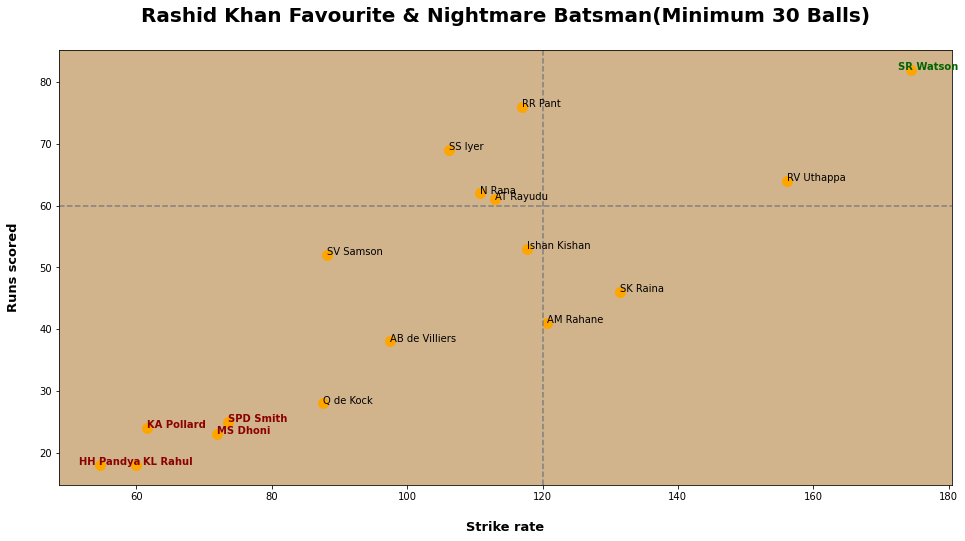

In [74]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(rdf3.strike_rate, rdf3.runs_off_bat,color = 'orange',s=100)
for i in range(len(rdf3)):
    if rdf3.striker[i] == 'HH Pandya':
        plt.text(rdf3.strike_rate[i]-3, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif rdf3.striker[i] == 'KL Rahul':
        plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif rdf3.striker[i] == 'SR Watson':
        plt.text(rdf3.strike_rate[i]-2, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif rdf3.striker[i] == 'KA Pollard' or rdf3.striker[i] == 'MS Dhoni' or rdf3.striker[i] == 'SPD Smith':
         plt.text(rdf3.strike_rate[i], rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(rdf3.strike_rate[i], rdf3.runs_off_bat[i],rdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("Rashid Khan Favourite & Nightmare Batsman(Minimum 30 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Rashid_vs_batsman.jpg')
plt.show()

In [75]:
# Find Chahal favourite and nightmare batsmen
chahal_df = df[(df.bowler == 'YS Chahal')]
chahal_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
84078,598029,2013,2013-04-24,Eden Gardens,1,13.5,Kolkata Knight Riders,Mumbai Indians,EJG Morgan,MK Tiwary,YS Chahal,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84079,598029,2013,2013-04-24,Eden Gardens,1,13.4,Kolkata Knight Riders,Mumbai Indians,MK Tiwary,EJG Morgan,YS Chahal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84080,598029,2013,2013-04-24,Eden Gardens,1,13.3,Kolkata Knight Riders,Mumbai Indians,EJG Morgan,MK Tiwary,YS Chahal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84081,598029,2013,2013-04-24,Eden Gardens,1,13.2,Kolkata Knight Riders,Mumbai Indians,EJG Morgan,MK Tiwary,YS Chahal,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84082,598029,2013,2013-04-24,Eden Gardens,1,13.1,Kolkata Knight Riders,Mumbai Indians,EJG Morgan,MK Tiwary,YS Chahal,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# runs scored by  batsman
cdf1 = pd.DataFrame(chahal_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
cdf1.head()

,striker,runs_off_bat
0,A Ashish Reddy,13
1,AD Hales,6
2,AD Nath,1
3,AD Russell,80
4,AJ Finch,32


In [77]:
cdf2 = pd.DataFrame(chahal_df.groupby('striker')['ball'].count()).reset_index()
cdf2.head()

,striker,ball
0,A Ashish Reddy,7
1,AD Hales,6
2,AD Nath,3
3,AD Russell,41
4,AJ Finch,31


In [78]:
cdf3 = cdf1.merge(cdf2, on = 'striker', how = 'left')
cdf3.head()

,striker,runs_off_bat,ball
0,A Ashish Reddy,13,7
1,AD Hales,6,6
2,AD Nath,1,3
3,AD Russell,80,41
4,AJ Finch,32,31


In [79]:
cdf3['strike_rate'] = 100*cdf3['runs_off_bat']/cdf3['ball']
cdf3.tail(30)

,striker,runs_off_bat,ball,strike_rate
100,R Parag,3,4,75.000000
101,R Tewatia,3,4,75.000000
102,RA Jadeja,24,23,104.347826
103,RA Tripathi,37,34,108.823529
104,RD Gaikwad,24,19,126.315789
105,RG Sharma,36,34,105.882353
106,RR Pant,54,42,128.571429
107,RV Uthappa,44,41,107.317073
108,S Dhawan,66,57,115.789474
109,S Dube,14,9,155.555556


In [80]:
cdf3 = cdf3[cdf3.ball >= 30]
cdf3.head()

,striker,runs_off_bat,ball,strike_rate
3,AD Russell,80,41,195.121951
4,AJ Finch,32,31,103.225806
6,AM Rahane,42,39,107.692308
9,AT Rayudu,58,76,76.315789
16,CA Lynn,87,62,140.322581


In [81]:
cdf3.reset_index(inplace = True, drop = True)
cdf3.tail(25)

,striker,runs_off_bat,ball,strike_rate
4,CA Lynn,87,62,140.322581
5,DA Warner,128,78,164.102564
6,DR Smith,59,33,178.787879
7,JC Buttler,25,30,83.333333
8,JP Duminy,49,39,125.641026
9,KA Pollard,69,44,156.818182
10,KD Karthik,30,33,90.909091
11,KK Nair,49,39,125.641026
12,KL Rahul,81,54,150.000000
13,KS Williamson,51,48,106.250000


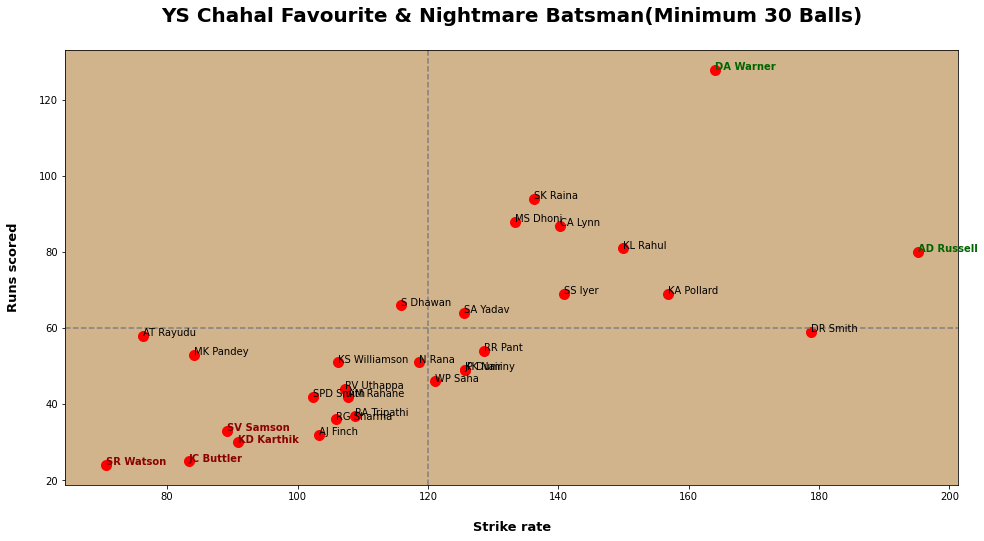

In [82]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(cdf3.strike_rate, cdf3.runs_off_bat,color = 'red', s= 100)
for i in range(len(cdf3)):
    if cdf3.striker[i] == 'SR Watson' or cdf3.striker[i] == 'JC Buttler' or cdf3.striker[i] == 'SV Samson' or cdf3.striker[i] == 'KD Karthik':
        plt.text(cdf3.strike_rate[i], cdf3.runs_off_bat[i],cdf3.striker[i],color = 'darkRed', fontweight ='bold')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    elif cdf3.striker[i] == 'DA Warner' or cdf3.striker[i] == 'AD Russell':
        plt.text(cdf3.strike_rate[i], cdf3.runs_off_bat[i],cdf3.striker[i],color = 'darkGreen', fontweight ='bold')
#     elif rdf3.striker[i] == 'KA Pollard' or rdf3.striker[i] == 'MS Dhoni' or rdf3.striker[i] == 'SPD Smith':
#          plt.text(rdf3.strike_rate[i], rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    else:
        plt.text(cdf3.strike_rate[i], cdf3.runs_off_bat[i],cdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("YS Chahal Favourite & Nightmare Batsman(Minimum 30 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Chahal_vs_batsman.jpg')
plt.show()

In [83]:
# Find Mishra favourite and nightmare batsmen
mishra_df = df[(df.bowler == 'A Mishra')]
mishra_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
7346,336015,2008,2008-05-11,Sawai Mansingh Stadium,2,14.6,Rajasthan Royals,Delhi Daredevils,SR Watson,AD Mascarenhas,A Mishra,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7347,336015,2008,2008-05-11,Sawai Mansingh Stadium,2,14.5,Rajasthan Royals,Delhi Daredevils,SR Watson,AD Mascarenhas,A Mishra,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7348,336015,2008,2008-05-11,Sawai Mansingh Stadium,2,14.4,Rajasthan Royals,Delhi Daredevils,SR Watson,AD Mascarenhas,A Mishra,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7349,336015,2008,2008-05-11,Sawai Mansingh Stadium,2,14.3,Rajasthan Royals,Delhi Daredevils,SR Watson,AD Mascarenhas,A Mishra,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7350,336015,2008,2008-05-11,Sawai Mansingh Stadium,2,14.2,Rajasthan Royals,Delhi Daredevils,AD Mascarenhas,SR Watson,A Mishra,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# runs scored by  batsman
mdf1 = pd.DataFrame(mishra_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
mdf1.head()

,striker,runs_off_bat
0,A Kumble,1
1,A Mithun,0
2,A Singh,0
3,A Symonds,60
4,A Zampa,5


In [85]:
mdf2 = pd.DataFrame(mishra_df.groupby('striker')['ball'].count()).reset_index()
mdf2.head()

,striker,ball
0,A Kumble,1
1,A Mithun,1
2,A Singh,1
3,A Symonds,42
4,A Zampa,6


In [86]:
mdf3 = mdf1.merge(mdf2, on = 'striker', how = 'left')
mdf3.head()

,striker,runs_off_bat,ball
0,A Kumble,1,1
1,A Mithun,0,1
2,A Singh,0,1
3,A Symonds,60,42
4,A Zampa,5,6


In [87]:
mdf3['strike_rate'] = 100*mdf3['runs_off_bat']/mdf3['ball']
mdf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
199,Y Nagar,9,5,180.000000
200,Y Venugopal Rao,6,6,100.000000
201,YK Pathan,94,61,154.098361
202,Yashpal Singh,1,2,50.000000
203,Yuvraj Singh,29,36,80.555556


In [88]:
mdf3 = mdf3[mdf3.ball >= 30]
mdf3.head()

,striker,runs_off_bat,ball,strike_rate
3,A Symonds,60,42,142.857143
9,AB de Villiers,40,37,108.108108
10,AC Gilchrist,38,33,115.151515
19,AM Rahane,96,81,118.518519
22,AT Rayudu,100,85,117.647059


In [89]:
mdf3.reset_index(inplace = True, drop = True)
mdf3.tail(25)

,striker,runs_off_bat,ball,strike_rate
15,JH Kallis,34,40,85.000000
16,KA Pollard,136,86,158.139535
17,KD Karthik,80,58,137.931034
18,KK Nair,61,43,141.860465
19,KM Jadhav,46,33,139.393939
20,KS Williamson,96,73,131.506849
21,LRPL Taylor,45,30,150.000000
22,MC Henriques,48,45,106.666667
23,MK Pandey,76,68,111.764706
24,MK Tiwary,47,34,138.235294


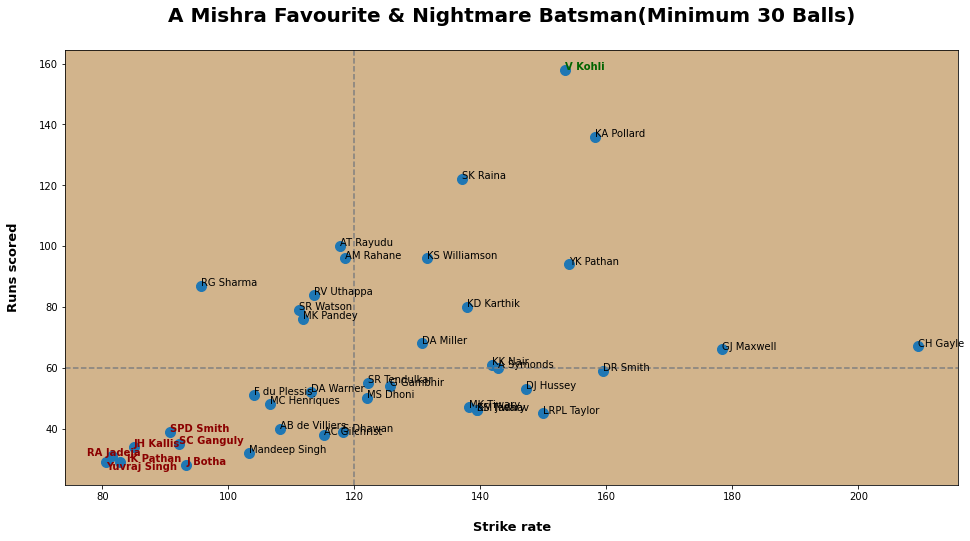

In [90]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(mdf3.strike_rate, mdf3.runs_off_bat, s=100)
for i in range(len(mdf3)):
    if mdf3.striker[i] == 'Yuvraj Singh':
        plt.text(mdf3.strike_rate[i], mdf3.runs_off_bat[i]-2.5,mdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif mdf3.striker[i] == 'RA Jadeja':
        plt.text(mdf3.strike_rate[i]-4, mdf3.runs_off_bat[i],mdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif mdf3.striker[i] == 'IK Pathan':
        plt.text(mdf3.strike_rate[i]+1, mdf3.runs_off_bat[i],mdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif mdf3.striker[i] == 'V Kohli':
        plt.text(mdf3.strike_rate[i], mdf3.runs_off_bat[i],mdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif mdf3.striker[i] == 'JH Kallis' or mdf3.striker[i] == 'SC Ganguly' or mdf3.striker[i] == 'SPD Smith' or mdf3.striker[i] == 'J Botha':
         plt.text(mdf3.strike_rate[i], mdf3.runs_off_bat[i],mdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(mdf3.strike_rate[i], mdf3.runs_off_bat[i],mdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("A Mishra Favourite & Nightmare Batsman(Minimum 30 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
#plt.savefig('Chart_Rashid_vs_batsman.jpg')
plt.show()

In [91]:
# Find Chawla favourite and nightmare batsmen
chawla_df = df[(df.bowler == 'PP Chawla')]
chawla_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
475,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,10.6,Chennai Super Kings,Kings XI Punjab,SK Raina,MEK Hussey,PP Chawla,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,10.5,Chennai Super Kings,Kings XI Punjab,SK Raina,MEK Hussey,PP Chawla,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,10.4,Chennai Super Kings,Kings XI Punjab,SK Raina,MEK Hussey,PP Chawla,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,10.3,Chennai Super Kings,Kings XI Punjab,SK Raina,MEK Hussey,PP Chawla,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,10.2,Chennai Super Kings,Kings XI Punjab,MEK Hussey,SK Raina,PP Chawla,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# runs scored by  batsman
pdf1 = pd.DataFrame(chawla_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
pdf1.head()

,striker,runs_off_bat
0,A Ashish Reddy,2
1,A Chopra,1
2,A Kumble,1
3,A Mishra,3
4,A Mithun,1


In [93]:
pdf2 = pd.DataFrame(chawla_df.groupby('striker')['ball'].count()).reset_index()
pdf2.head()

,striker,ball
0,A Ashish Reddy,2
1,A Chopra,1
2,A Kumble,4
3,A Mishra,4
4,A Mithun,1


In [95]:
pdf3 = pdf1.merge(pdf2, on = 'striker', how = 'left')
pdf3.head()

,striker,runs_off_bat,ball
0,A Ashish Reddy,2,2
1,A Chopra,1,1
2,A Kumble,1,4
3,A Mishra,3,4
4,A Mithun,1,1


In [96]:
pdf3['strike_rate'] = 100*pdf3['runs_off_bat']/pdf3['ball']
pdf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
185,Y Nagar,1,1,100.000000
186,Y Venugopal Rao,11,21,52.380952
187,YK Pathan,22,22,100.000000
188,Yuvraj Singh,37,26,142.307692
189,Z Khan,0,5,0.000000


In [97]:
pdf3 = pdf3[pdf3.ball >= 30]
pdf3.head()

,striker,runs_off_bat,ball,strike_rate
8,AB de Villiers,53,52,101.923077
15,AM Rahane,115,83,138.554217
18,AT Rayudu,75,49,153.061224
22,BB McCullum,63,60,105.000000
32,CH Gayle,116,66,175.757576


In [98]:
pdf3.reset_index(inplace = True, drop = True)
pdf3.tail(15)

,striker,runs_off_bat,ball,strike_rate
23,PP Shaw,47,31,151.612903
24,R Dravid,38,40,95.000000
25,RA Jadeja,70,58,120.689655
26,RG Sharma,146,115,126.956522
27,RV Uthappa,43,45,95.555556
28,S Dhawan,92,60,153.333333
29,SK Raina,175,102,171.568627
30,SPD Smith,62,49,126.530612
31,SR Tendulkar,61,54,112.962963
32,SR Watson,87,51,170.588235


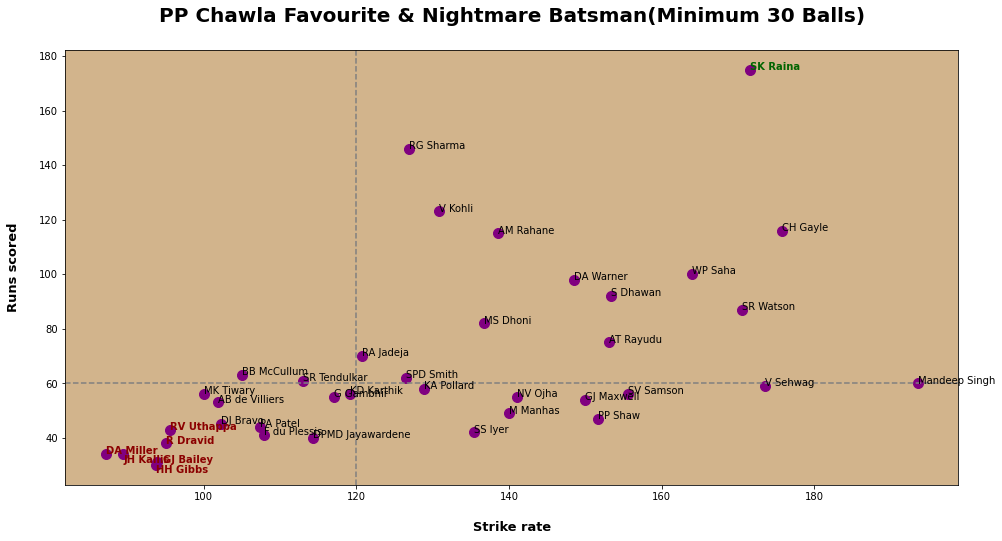

In [99]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(pdf3.strike_rate, pdf3.runs_off_bat,color = 'purple',s=100)
for i in range(len(pdf3)):
    if pdf3.striker[i] == 'JH Kallis' or pdf3.striker[i] == 'HH Gibbs' :
        plt.text(pdf3.strike_rate[i], pdf3.runs_off_bat[i]-3,pdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif pdf3.striker[i] == 'GJ Bailey':
        plt.text(pdf3.strike_rate[i]+0.75, pdf3.runs_off_bat[i],pdf3.striker[i],color = 'darkRed', fontweight ='bold')
    elif pdf3.striker[i] == 'SK Raina':
        plt.text(pdf3.strike_rate[i], pdf3.runs_off_bat[i],pdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif pdf3.striker[i] == 'DA Miller' or pdf3.striker[i] == 'R Dravid' or pdf3.striker[i] == 'RV Uthappa':
         plt.text(pdf3.strike_rate[i], pdf3.runs_off_bat[i],pdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(pdf3.strike_rate[i], pdf3.runs_off_bat[i],pdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("PP Chawla Favourite & Nightmare Batsman(Minimum 30 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_chawla_vs_batsman.jpg')
plt.show()

In [100]:
# Find Tahir favourite and nightmare batsmen
tahir_df = df[(df.bowler == 'Imran Tahir')]
tahir_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
102353,733993,2014,2014-05-10,Feroz Shah Kotla,2,2.7,Sunrisers Hyderabad,Delhi Daredevils,AJ Finch,DA Warner,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102354,733993,2014,2014-05-10,Feroz Shah Kotla,2,2.6,Sunrisers Hyderabad,Delhi Daredevils,DA Warner,AJ Finch,Imran Tahir,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102355,733993,2014,2014-05-10,Feroz Shah Kotla,2,2.5,Sunrisers Hyderabad,Delhi Daredevils,AJ Finch,DA Warner,Imran Tahir,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102356,733993,2014,2014-05-10,Feroz Shah Kotla,2,2.3,Sunrisers Hyderabad,Delhi Daredevils,AJ Finch,DA Warner,Imran Tahir,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102357,733993,2014,2014-05-10,Feroz Shah Kotla,2,2.2,Sunrisers Hyderabad,Delhi Daredevils,DA Warner,AJ Finch,Imran Tahir,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# runs scored by  batsman
idf1 = pd.DataFrame(tahir_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
idf1.head()

,striker,runs_off_bat
0,A Ashish Reddy,2
1,A Mishra,1
2,AB de Villiers,58
3,AD Nath,4
4,AD Russell,26


In [102]:
idf2 = pd.DataFrame(tahir_df.groupby('striker')['ball'].count()).reset_index()
idf2.head()

,striker,ball
0,A Ashish Reddy,2
1,A Mishra,3
2,AB de Villiers,41
3,AD Nath,7
4,AD Russell,28


In [103]:
idf3 = idf1.merge(idf2, on = 'striker', how = 'left')
idf3.head()

,striker,runs_off_bat,ball
0,A Ashish Reddy,2,2
1,A Mishra,1,3
2,AB de Villiers,58,41
3,AD Nath,4,7
4,AD Russell,26,28


In [104]:
idf3['strike_rate'] = 100*idf3['runs_off_bat']/idf3['ball']
idf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,2,2,100.000000
1,A Mishra,1,3,33.333333
2,AB de Villiers,58,41,141.463415
3,AD Nath,4,7,57.142857
4,AD Russell,26,28,92.857143


In [105]:
idf3 = idf3[idf3.ball >= 25]
idf3.head()

,striker,runs_off_bat,ball,strike_rate
2,AB de Villiers,58,41,141.463415
4,AD Russell,26,28,92.857143
9,AR Patel,27,29,93.103448
12,BA Stokes,43,32,134.375000
18,CH Gayle,45,26,173.076923


In [106]:
idf3.reset_index(inplace = True, drop = True)
idf3.head(20)

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,58,41,141.463415
1,AD Russell,26,28,92.857143
2,AR Patel,27,29,93.103448
3,BA Stokes,43,32,134.375000
4,CH Gayle,45,26,173.076923
5,DA Miller,38,28,135.714286
6,GJ Maxwell,45,25,180.000000
7,Ishan Kishan,45,30,150.000000
8,KA Pollard,46,28,164.285714
9,KD Karthik,31,27,114.814815


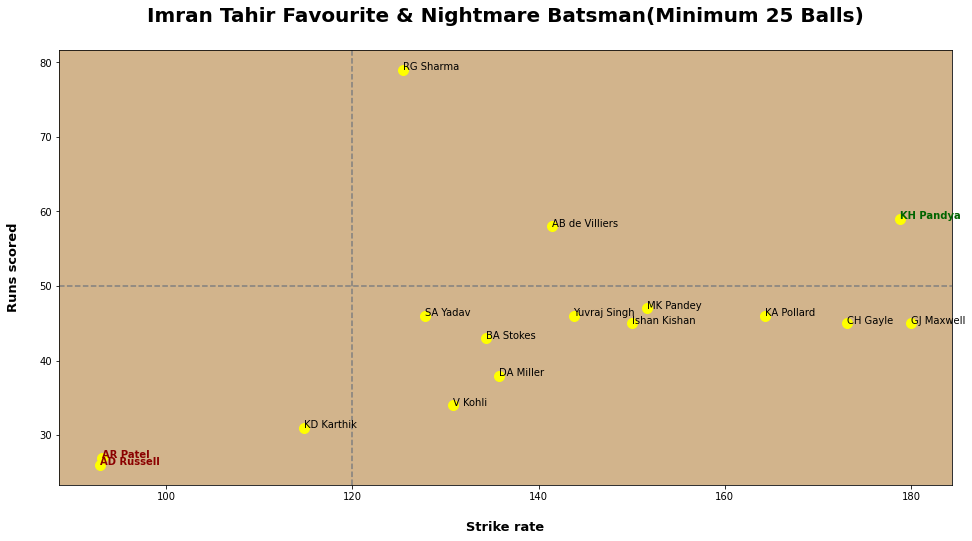

In [107]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(idf3.strike_rate, idf3.runs_off_bat,color = 'yellow',s=100)
for i in range(len(idf3)):
#     if rdf3.striker[i] == 'HH Pandya':
#         plt.text(rdf3.strike_rate[i]-3, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    if idf3.striker[i] == 'KH Pandya':
        plt.text(idf3.strike_rate[i], idf3.runs_off_bat[i],idf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif idf3.striker[i] == 'AR Patel' or idf3.striker[i] == 'AD Russell':
         plt.text(idf3.strike_rate[i], idf3.runs_off_bat[i],idf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(idf3.strike_rate[i], idf3.runs_off_bat[i],idf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(50, ls = '--', color = 'grey')
plt.title("Imran Tahir Favourite & Nightmare Batsman(Minimum 25 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Tahir_vs_batsman.jpg')
plt.show()

In [108]:

# Find Chahar favourite and nightmare batsmen
chahar_df = df[(df.bowler == 'RD Chahar')]
chahar_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
137689,1082594,2017,2017-04-08,Holkar Cricket Stadium,2,12.7,Kings XI Punjab,Rising Pune Supergiant,DA Miller,GJ Maxwell,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137690,1082594,2017,2017-04-08,Holkar Cricket Stadium,2,12.6,Kings XI Punjab,Rising Pune Supergiant,GJ Maxwell,DA Miller,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137691,1082594,2017,2017-04-08,Holkar Cricket Stadium,2,12.5,Kings XI Punjab,Rising Pune Supergiant,GJ Maxwell,DA Miller,RD Chahar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137692,1082594,2017,2017-04-08,Holkar Cricket Stadium,2,12.4,Kings XI Punjab,Rising Pune Supergiant,GJ Maxwell,DA Miller,RD Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137693,1082594,2017,2017-04-08,Holkar Cricket Stadium,2,12.3,Kings XI Punjab,Rising Pune Supergiant,DA Miller,GJ Maxwell,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# runs scored by  batsman
chdf1 = pd.DataFrame(chahar_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
chdf1.head()

,striker,runs_off_bat
0,AB de Villiers,34
1,AD Russell,18
2,AJ Finch,24
3,AM Rahane,10
4,AR Patel,18


In [110]:
chdf2 = pd.DataFrame(chahar_df.groupby('striker')['ball'].count()).reset_index()
chdf2.head()

,striker,ball
0,AB de Villiers,28
1,AD Russell,9
2,AJ Finch,14
3,AM Rahane,6
4,AR Patel,18


In [111]:


chdf3 = chdf1.merge(chdf2, on = 'striker', how = 'left')
chdf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,34,28
1,AD Russell,18,9
2,AJ Finch,24,14
3,AM Rahane,10,6
4,AR Patel,18,18


In [112]:
chdf3['strike_rate'] = 100*chdf3['runs_off_bat']/chdf3['ball']
chdf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
72,V Shankar,12,19,63.157895
73,Virat Singh,3,5,60.000000
74,WP Saha,9,9,100.000000
75,YBK Jaiswal,8,5,160.000000
76,YK Pathan,0,1,0.000000


In [113]:
chdf3 = chdf3[chdf3.ball >= 20]
chdf3.head(20)

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,34,28,121.428571
6,AT Rayudu,37,26,142.307692
13,CH Gayle,30,25,120.000000
14,D Padikkal,40,24,166.666667
16,DA Warner,50,30,166.666667
23,EJG Morgan,10,21,47.619048
25,GJ Maxwell,38,30,126.666667
28,JC Buttler,43,26,165.384615
33,KL Rahul,36,35,102.857143
42,MK Pandey,24,22,109.090909


In [114]:
chdf3.reset_index(inplace = True, drop = True)
chdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,34,28,121.428571
1,AT Rayudu,37,26,142.307692
2,CH Gayle,30,25,120.000000
3,D Padikkal,40,24,166.666667
4,DA Warner,50,30,166.666667


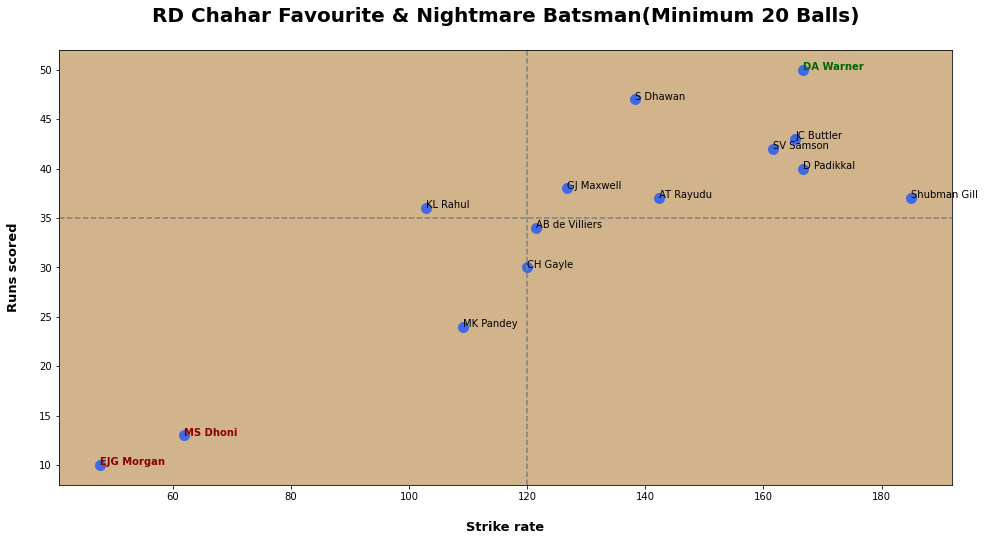

In [115]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(chdf3.strike_rate, chdf3.runs_off_bat,color = 'royalblue',s=100)
for i in range(len(chdf3)):
#     if rdf3.striker[i] == 'HH Pandya':
#         plt.text(rdf3.strike_rate[i]-3, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    if chdf3.striker[i] == 'DA Warner':
        plt.text(chdf3.strike_rate[i], chdf3.runs_off_bat[i],chdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif chdf3.striker[i] == 'EJG Morgan' or chdf3.striker[i] == 'MS Dhoni':
         plt.text(chdf3.strike_rate[i], chdf3.runs_off_bat[i],chdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(chdf3.strike_rate[i], chdf3.runs_off_bat[i],chdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(35, ls = '--', color = 'grey')
plt.title("RD Chahar Favourite & Nightmare Batsman(Minimum 20 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Chahar_vs_batsman.jpg')
plt.show()

In [116]:
# Find Bishnoi favourite and nightmare batsmen
ravi_df = df[(df.bowler == 'Ravi Bishnoi')]
ravi_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179453,1216493,2020,2020-09-20,Dubai International Cricket Stadium,1,9.1,Delhi Capitals,Kings XI Punjab,RR Pant,SS Iyer,Ravi Bishnoi,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179454,1216493,2020,2020-09-20,Dubai International Cricket Stadium,1,9.2,Delhi Capitals,Kings XI Punjab,RR Pant,SS Iyer,Ravi Bishnoi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179455,1216493,2020,2020-09-20,Dubai International Cricket Stadium,1,9.3,Delhi Capitals,Kings XI Punjab,RR Pant,SS Iyer,Ravi Bishnoi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179456,1216493,2020,2020-09-20,Dubai International Cricket Stadium,1,9.4,Delhi Capitals,Kings XI Punjab,RR Pant,SS Iyer,Ravi Bishnoi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179457,1216493,2020,2020-09-20,Dubai International Cricket Stadium,1,9.5,Delhi Capitals,Kings XI Punjab,SS Iyer,RR Pant,Ravi Bishnoi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# runs scored by  batsman
radf1 = pd.DataFrame(ravi_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
radf1.head()

,striker,runs_off_bat
0,AB de Villiers,13
1,AD Russell,1
2,AJ Finch,7
3,AR Patel,2
4,AT Rayudu,9


In [118]:
radf2 = pd.DataFrame(ravi_df.groupby('striker')['ball'].count()).reset_index()
radf2.head()

,striker,ball
0,AB de Villiers,11
1,AD Russell,2
2,AJ Finch,8
3,AR Patel,3
4,AT Rayudu,7


In [119]:
radf3 = radf1.merge(radf2, on = 'striker', how = 'left')
radf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,13,11
1,AD Russell,1,2
2,AJ Finch,7,8
3,AR Patel,2,3
4,AT Rayudu,9,7


In [120]:
radf3['strike_rate'] = 100*radf3['runs_off_bat']/radf3['ball']
radf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
43,Shubman Gill,32,22,145.454545
44,UT Yadav,0,2,0.000000
45,V Kohli,16,18,88.888889
46,V Shankar,3,9,33.333333
47,Washington Sundar,11,7,157.142857


In [121]:
radf3 = radf3[radf3.ball >= 10]
radf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,13,11,118.181818
9,EJG Morgan,12,22,54.545455
10,F du Plessis,21,18,116.666667
13,Ishan Kishan,13,11,118.181818
22,MK Pandey,7,13,53.846154


In [122]:
radf3.reset_index(inplace = True, drop = True)
radf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,13,11,118.181818
1,EJG Morgan,12,22,54.545455
2,F du Plessis,21,18,116.666667
3,Ishan Kishan,13,11,118.181818
4,MK Pandey,7,13,53.846154


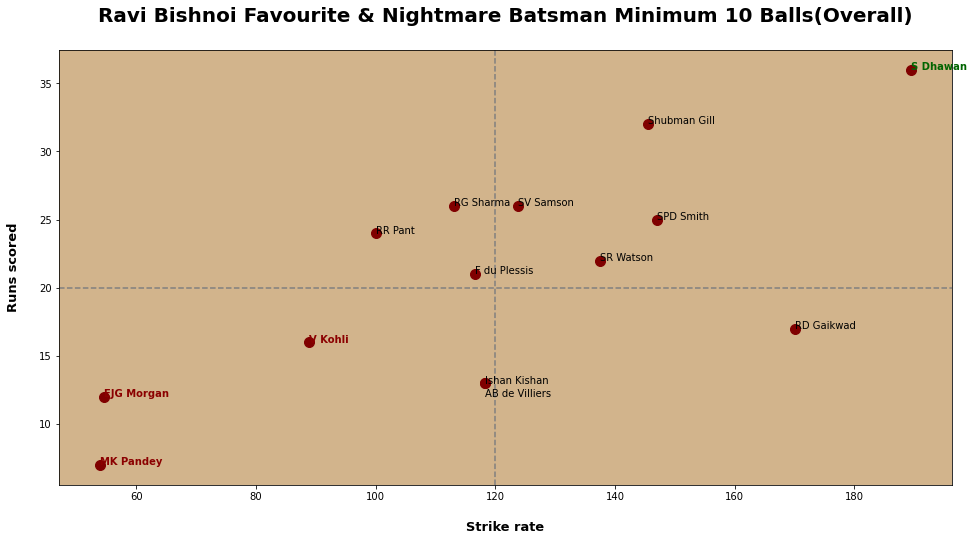

In [123]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(radf3.strike_rate, radf3.runs_off_bat,color = 'maroon',s=100)
for i in range(len(radf3)):
    if radf3.striker[i] == 'AB de Villiers':
        plt.text(radf3.strike_rate[i], radf3.runs_off_bat[i]-1,radf3.striker[i])
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    elif radf3.striker[i] == 'S Dhawan':
        plt.text(radf3.strike_rate[i], radf3.runs_off_bat[i],radf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif radf3.striker[i] == 'MK Pandey' or radf3.striker[i] == 'EJG Morgan' or radf3.striker[i] == 'V Kohli':
         plt.text(radf3.strike_rate[i], radf3.runs_off_bat[i],radf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(radf3.strike_rate[i], radf3.runs_off_bat[i],radf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(20, ls = '--', color = 'grey')
plt.title("Ravi Bishnoi Favourite & Nightmare Batsman Minimum 10 Balls(Overall)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Bishnoi_vs_batsman.jpg')
plt.show()

In [124]:
# Find Bishnoi favourite and nightmare batsmen
ashwin_df = df[(df.bowler == 'M Ashwin')]
ashwin_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
122672,980901,2016,2016-04-09,Wankhede Stadium,1,14.1,Mumbai Indians,Rising Pune Supergiants,AT Rayudu,Harbhajan Singh,M Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122673,980901,2016,2016-04-09,Wankhede Stadium,1,14.2,Mumbai Indians,Rising Pune Supergiants,AT Rayudu,Harbhajan Singh,M Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122674,980901,2016,2016-04-09,Wankhede Stadium,1,14.3,Mumbai Indians,Rising Pune Supergiants,AT Rayudu,Harbhajan Singh,M Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122675,980901,2016,2016-04-09,Wankhede Stadium,1,14.4,Mumbai Indians,Rising Pune Supergiants,Harbhajan Singh,AT Rayudu,M Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122676,980901,2016,2016-04-09,Wankhede Stadium,1,14.5,Mumbai Indians,Rising Pune Supergiants,Harbhajan Singh,AT Rayudu,M Ashwin,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# runs scored by  batsman
adf1 = pd.DataFrame(ashwin_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
adf1.head()

,striker,runs_off_bat
0,AB de Villiers,55
1,AD Russell,1
2,AJ Finch,26
3,AJ Turner,0
4,AM Rahane,7


In [126]:
adf2 = pd.DataFrame(ashwin_df.groupby('striker')['ball'].count()).reset_index()
adf2.head()

,striker,ball
0,AB de Villiers,31
1,AD Russell,1
2,AJ Finch,16
3,AJ Turner,2
4,AM Rahane,6


In [127]:
adf3 = adf1.merge(adf2, on = 'striker', how = 'left')
adf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,55,31
1,AD Russell,1,1
2,AJ Finch,26,16
3,AJ Turner,0,2
4,AM Rahane,7,6


In [128]:
adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']
adf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
69,WP Saha,1,2,50.000000
70,Washington Sundar,4,8,50.000000
71,YK Pathan,32,17,188.235294
72,YS Chahal,1,4,25.000000
73,Yuvraj Singh,3,9,33.333333


In [129]:
adf3 = adf3[adf3.ball >= 15]
adf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,55,31,177.419355
2,AJ Finch,26,16,162.500000
5,AT Rayudu,11,17,64.705882
13,DA Warner,19,22,86.363636
18,F du Plessis,51,37,137.837838


In [130]:
adf3.reset_index(inplace = True, drop = True)
adf3.tail(8)

,striker,runs_off_bat,ball,strike_rate
9,Q de Kock,29,19,152.631579
10,RV Uthappa,44,24,183.333333
11,S Dhawan,37,27,137.037037
12,SA Yadav,8,15,53.333333
13,SK Raina,32,32,100.000000
14,SV Samson,43,31,138.709677
15,V Kohli,33,31,106.451613
16,YK Pathan,32,17,188.235294


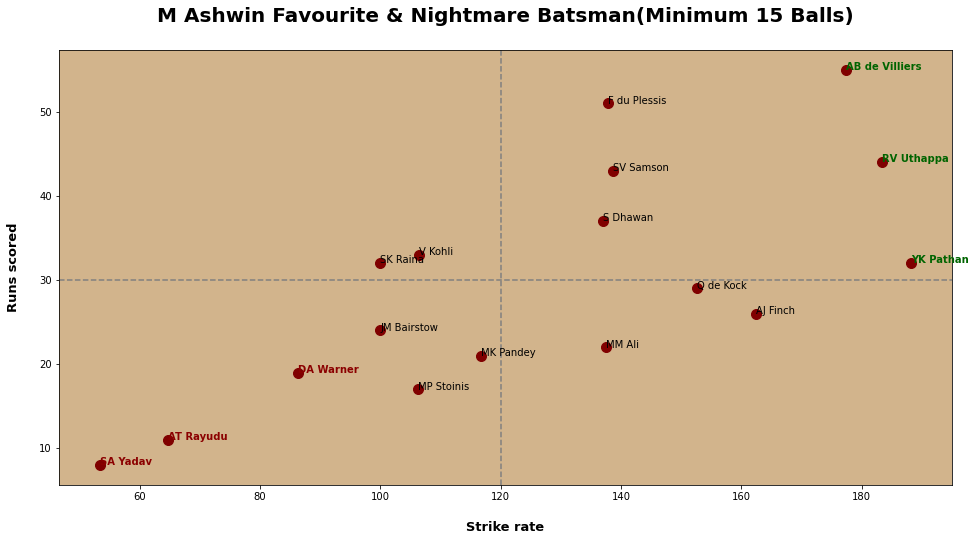

In [131]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(adf3.strike_rate, adf3.runs_off_bat,color = 'maroon',s=100)
for i in range(len(adf3)):
#     if rdf3.striker[i] == 'HH Pandya':
#         plt.text(rdf3.strike_rate[i]-3, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    if adf3.striker[i] == 'AB de Villiers' or adf3.striker[i] == 'RV Uthappa' or adf3.striker[i] == 'YK Pathan' :
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i],adf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif adf3.striker[i] == 'SA Yadav' or adf3.striker[i] == 'DA Warner' or adf3.striker[i] == 'AT Rayudu':
         plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i],adf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i],adf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(30, ls = '--', color = 'grey')
plt.title("M Ashwin Favourite & Nightmare Batsman(Minimum 15 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Ashwin_vs_batsman.jpg')
plt.show()

In [132]:
# Find S Gopal favourite and nightmare batsmen
gopal_df = df[(df.bowler == 'S Gopal')]
gopal_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
105182,734017,2014,2014-05-19,"Sardar Patel Stadium, Motera",2,14.5,Rajasthan Royals,Mumbai Indians,JP Faulkner,BJ Hodge,S Gopal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105183,734017,2014,2014-05-19,"Sardar Patel Stadium, Motera",2,14.4,Rajasthan Royals,Mumbai Indians,BJ Hodge,JP Faulkner,S Gopal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105184,734017,2014,2014-05-19,"Sardar Patel Stadium, Motera",2,14.3,Rajasthan Royals,Mumbai Indians,BJ Hodge,JP Faulkner,S Gopal,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105185,734017,2014,2014-05-19,"Sardar Patel Stadium, Motera",2,14.2,Rajasthan Royals,Mumbai Indians,JP Faulkner,BJ Hodge,S Gopal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105186,734017,2014,2014-05-19,"Sardar Patel Stadium, Motera",2,14.1,Rajasthan Royals,Mumbai Indians,BJ Hodge,JP Faulkner,S Gopal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# runs scored by  batsman
gdf1 = pd.DataFrame(gopal_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
gdf1.head()

,striker,runs_off_bat
0,AB de Villiers,30
1,AD Russell,17
2,AJ Finch,4
3,AM Rahane,17
4,AR Patel,1


In [134]:
gdf2 = pd.DataFrame(gopal_df.groupby('striker')['ball'].count()).reset_index()
gdf2.head()

,striker,ball
0,AB de Villiers,34
1,AD Russell,9
2,AJ Finch,5
3,AM Rahane,16
4,AR Patel,1


In [135]:
gdf3 = gdf1.merge(gdf2, on = 'striker', how = 'left')
gdf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,30,34
1,AD Russell,17,9
2,AJ Finch,4,5
3,AM Rahane,17,16
4,AR Patel,1,1


In [136]:
gdf3['strike_rate'] = 100*gdf3['runs_off_bat']/gdf3['ball']
gdf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
74,TG Southee,0,2,0.000000
75,V Kohli,68,39,174.358974
76,V Shankar,19,16,118.750000
77,WP Saha,1,3,33.333333
78,YK Pathan,1,1,100.000000


In [137]:
gdf3 = gdf3[gdf3.ball >= 20]
gdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,30,34,88.235294
12,D Padikkal,32,25,128.000000
14,DA Warner,29,21,138.095238
25,JM Bairstow,21,21,100.000000
29,KD Karthik,47,31,151.612903


In [138]:
gdf3.reset_index(inplace = True, drop = True)
gdf3.tail(10)

,striker,runs_off_bat,ball,strike_rate
5,KL Rahul,42,40,105.000000
6,MK Pandey,48,32,150.000000
7,MP Stoinis,38,29,131.034483
8,MS Dhoni,34,30,113.333333
9,Q de Kock,18,28,64.285714
10,RR Pant,38,26,146.153846
11,S Dhawan,41,24,170.833333
12,SA Yadav,64,40,160.000000
13,Shubman Gill,49,26,188.461538
14,V Kohli,68,39,174.358974


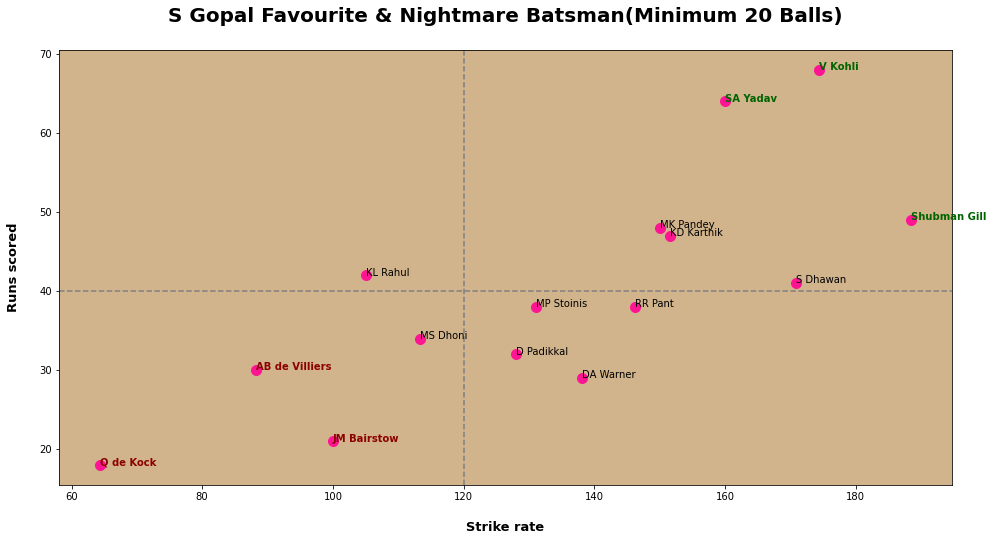

In [139]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(gdf3.strike_rate, gdf3.runs_off_bat,color = 'deeppink',s=100)
for i in range(len(gdf3)):
#     if rdf3.striker[i] == 'HH Pandya':
#         plt.text(rdf3.strike_rate[i]-3, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    if gdf3.striker[i] == 'V Kohli' or gdf3.striker[i] ==  'SA Yadav'or gdf3.striker[i] == 'Shubman Gill' :
        plt.text(gdf3.strike_rate[i], gdf3.runs_off_bat[i],gdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif gdf3.striker[i] == 'Q de Kock' or gdf3.striker[i] == 'JM Bairstow' or gdf3.striker[i] == 'AB de Villiers':
         plt.text(gdf3.strike_rate[i], gdf3.runs_off_bat[i],gdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(gdf3.strike_rate[i], gdf3.runs_off_bat[i],gdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(40, ls = '--', color = 'grey')
plt.title("S Gopal Favourite & Nightmare Batsman(Minimum 20 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Gopal_vs_batsman.jpg')
plt.show()

In [140]:
# Find Tewatia favourite and nightmare batsmen
tewatia_df = df[(df.bowler == 'R Tewatia')]
tewatia_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
100368,733979,2014,2014-05-05,"Sardar Patel Stadium, Motera",2,10.1,Kolkata Knight Riders,Rajasthan Royals,RV Uthappa,G Gambhir,R Tewatia,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100643,733979,2014,2014-05-05,"Sardar Patel Stadium, Motera",2,10.6,Kolkata Knight Riders,Rajasthan Royals,G Gambhir,RV Uthappa,R Tewatia,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100644,733979,2014,2014-05-05,"Sardar Patel Stadium, Motera",2,10.5,Kolkata Knight Riders,Rajasthan Royals,RV Uthappa,G Gambhir,R Tewatia,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100645,733979,2014,2014-05-05,"Sardar Patel Stadium, Motera",2,10.4,Kolkata Knight Riders,Rajasthan Royals,G Gambhir,RV Uthappa,R Tewatia,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100647,733979,2014,2014-05-05,"Sardar Patel Stadium, Motera",2,10.3,Kolkata Knight Riders,Rajasthan Royals,RV Uthappa,G Gambhir,R Tewatia,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# runs scored by  batsman
tdf1 = pd.DataFrame(tewatia_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
tdf1.head()

,striker,runs_off_bat
0,AB de Villiers,22
1,AD Russell,11
2,AM Rahane,12
3,AT Rayudu,18
4,CA Lynn,9


In [142]:
tdf2 = pd.DataFrame(tewatia_df.groupby('striker')['ball'].count()).reset_index()
tdf2.head()

,striker,ball
0,AB de Villiers,14
1,AD Russell,7
2,AM Rahane,14
3,AT Rayudu,14
4,CA Lynn,15


In [143]:
tdf3 = tdf1.merge(tdf2, on = 'striker', how = 'left')
tdf3.head()

,striker,runs_off_bat,ball
0,AB de Villiers,22,14
1,AD Russell,11,7
2,AM Rahane,12,14
3,AT Rayudu,18,14
4,CA Lynn,9,15


In [144]:
tdf3['strike_rate'] = 100*tdf3['runs_off_bat']/tdf3['ball']
tdf3.tail(5)

,striker,runs_off_bat,ball,strike_rate
63,V Kohli,40,36,111.111111
64,V Shankar,19,26,73.076923
65,VH Zol,1,2,50.000000
66,WP Saha,4,6,66.666667
67,Yuvraj Singh,13,12,108.333333


In [145]:
tdf3 = tdf3[tdf3.ball >= 15]
tdf3.head()

,striker,runs_off_bat,ball,strike_rate
4,CA Lynn,9,15,60.000000
5,CH Gayle,29,23,126.086957
8,D Padikkal,37,32,115.625000
9,DA Miller,17,19,89.473684
14,F du Plessis,25,15,166.666667


In [146]:
tdf3.reset_index(inplace = True, drop = True)
#tdf3.head(15)

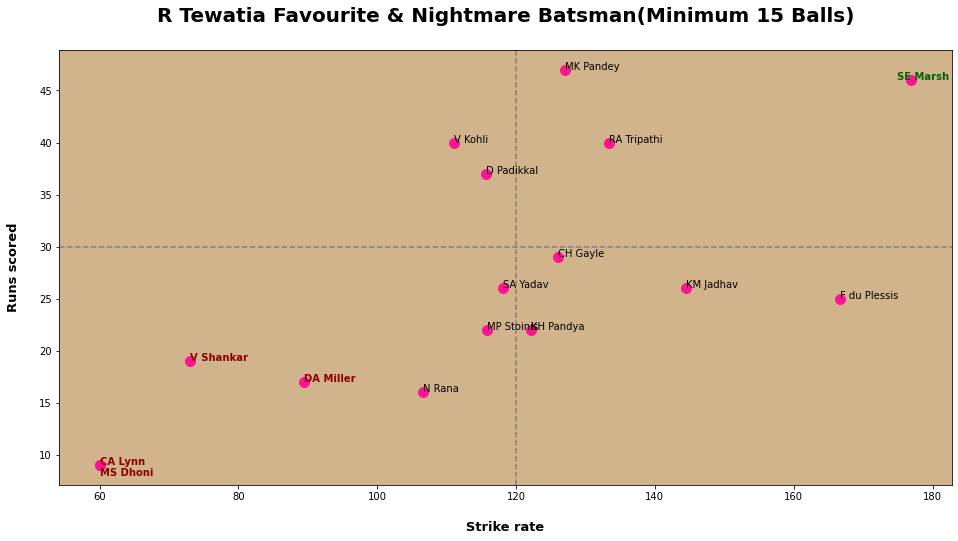

In [147]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = 'tan'

plt.scatter(tdf3.strike_rate, tdf3.runs_off_bat,color = 'deeppink',s=100)
for i in range(len(tdf3)):
    if tdf3.striker[i] == 'MS Dhoni':
        plt.text(tdf3.strike_rate[i], tdf3.runs_off_bat[i]-1,tdf3.striker[i],color = 'darkRed', fontweight ='bold')
#     elif rdf3.striker[i] == 'KL Rahul':
#         plt.text(rdf3.strike_rate[i]+1, rdf3.runs_off_bat[i],rdf3.striker[i],color = 'darkRed')
    elif tdf3.striker[i] == 'SE Marsh':
        plt.text(tdf3.strike_rate[i]-2, tdf3.runs_off_bat[i],tdf3.striker[i],color = 'darkGreen', fontweight ='bold')
    elif tdf3.striker[i] == 'CA Lynn' or tdf3.striker[i] == 'V Shankar' or tdf3.striker[i] == 'DA Miller':
         plt.text(tdf3.strike_rate[i], tdf3.runs_off_bat[i],tdf3.striker[i],color = 'darkRed', fontweight ='bold')
    else:
        plt.text(tdf3.strike_rate[i], tdf3.runs_off_bat[i],tdf3.striker[i])
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(30, ls = '--', color = 'grey')
plt.title("R Tewatia Favourite & Nightmare Batsman(Minimum 15 Balls)\n",fontweight ='bold', fontsize = 20)
plt.xlabel('\nStrike rate',fontweight ='bold', fontsize = 13)
plt.ylabel('Runs scored\n',fontweight ='bold', fontsize = 13)
plt.savefig('Chart_Tewatia_vs_batsman.jpg')
plt.show()